# REQUIREMENT

Clients wants to create a Road Accident Dashboard for year 2021 and 2022 so that they can have insight on the below requirements-

❖ Primary KPI - Total Casualties taken place after the accident

❖ Primary KPl's - Total Casualties & percentage of total with respect to accident severity and maximum casualties by type of vehicle

❖ Secondary KPl's - Total Casualties with respect to vehicle type

❖ Monthly trend showing comparison of casualties for Current Year and Previous Year

❖ Maximum casualties by Road Type

❖ Distribution of total casualties by Road Surface

❖ Relation between Casualties by Area/ Location & by Day/ Night

❖ Relation between Casualties, Speed Limit, and Road Type

❖ Relation between Casualties by Speed limit, Road Type, and Weather Conditions

# STAKEHOLDERS

❖ Ministry of Transport

❖ Road Transport Department

❖ Police Force

❖ Emergency Services Department

❖ Road Safety Corps

❖ Transport Operators

❖ Traffic Management Agencies

❖ Public

❖ Media

# METADATA

✓ File Extension - .xlsx

✓ No of Rows - 3.07 Million

✓ No of Fields - 21

# import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('/kaggle/input/road-accident-data-analysis/Road Accident Data.xlsx')

# Data Information

#### Display the DataFrame

In [3]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         5424 non-null    object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

# Here's a brief overview of the DataFrame:

Rows and Columns: The DataFrame has 307,973 entries and 21 columns. Column Data Types:

object: This is typically used for columns with textual data.

datetime64[ns]: Used for date and time data.

float64: Used for columns with floating-point numbers.

int64: Used for columns with integer values.

Notable Columns:

Accident_Index: An identifier for each accident.

Accident Date: Date and time of the accident.

Day_of_Week: Day of the week when the accident occurred.

Accident_Severity: Severity level of the accident.

Latitude and Longitude: Geographic coordinates of the accident.

Number_of_Casualties and Number_of_Vehicles: Counts of 

casualties and vehicles involved.

Road_Type: Type of road where the accident occurred.

Speed_limit: Speed limit on the road.

Urban_or_Rural_Area: Indicates whether the accident 

occurred in an urban or rural area.

Weather_Conditions: Weather conditions during the accident.

Vehicle_Type: Type of vehicle involved in the accident.

Missing Values:

Some columns, such as Carriageway_Hazards, have a significant number of missing values.

Other columns like Road_Surface_Conditions, Road_Type, Time, and Weather_Conditions also have some missing values.

In [5]:
df.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,52.487005,-1.368884,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,1.339011,1.356092,0.815857,0.710477,14.032933


The provided summary outlines statistics for specific columns in the DataFrame related to road accidents. Here's a concise summary:

1.Accident Date:

Count: 307,973 accidents recorded.
Date Range: From January 1, 2021, to December 31, 2022.
Most frequent date: December 23, 2021, at approximately 22:19:40.

2.Latitude and Longitude:

Latitude ranges from 49.91 to 60.60, with a mean of 52.49.
Longitude ranges from -7.52 to 1.76, with a mean of -1.37.
Standard deviation: Approximately 1.34 for latitude and 1.36 for longitude.

3.Number of Casualties:

Mean: 1.36 casualties per accident.

Minimum: 1 casualty.

Maximum: 48 casualties.

Standard deviation: Approximately 0.82.

4.Number of Vehicles:

Mean: 1.83 vehicles involved per accident.

Minimum: 1 vehicle.

Maximum: 32 vehicles.

Standard deviation: Approximately 0.71.

Speed Limit:

Mean speed limit: 38.87 mph.

Minimum speed limit: 10 mph.

Maximum speed limit: 70 mph.

Standard deviation: Approximately 14.03.

6.Accident Date Standard Deviation (Std):

The standard deviation for the Accident Date is not available.

# Data Preparing

In [6]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary
# Example: df = df.dropna()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64


In [7]:
# Fill null values with a constant (e.g., 0)
df = df.fillna(-1)

In [8]:
# Check for missing values
print(df.isnull().sum())

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64


In [9]:
# check for duplicates
print(f'train : {df.duplicated().sum()}')

train : 1


In [10]:
# Remove duplicates
df = df.drop_duplicates()

# Verify that duplicates have been removed
print(f'Number of duplicates after removal: {df.duplicated().sum()}')

Number of duplicates after removal: 0


In [11]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     263279
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64

In [12]:
# Replace values in the "Accident_Severity" column
df['Accident_Severity'] = df['Accident_Severity'].replace({'Fetal': 'Fatal', 'ny': 'Fatal'})

# Verify the changes
print(df['Accident_Severity'].value_counts())

Accident_Severity
Slight     263279
Serious     40740
Fatal        3953
Name: count, dtype: int64


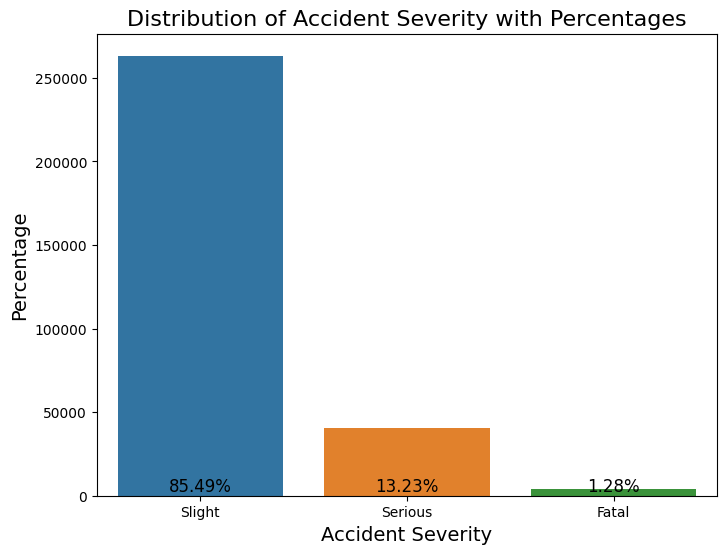

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a column named 'Accident_Severity'

# Calculate the percentage distribution of accident severity
severity_percentage = df['Accident_Severity'].value_counts(normalize=True) * 100

# Plot the distribution of accident severity with percentages
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=df, order=severity_percentage.index)
plt.title('Distribution of Accident Severity with Percentages', fontsize=16)
plt.xlabel('Accident Severity', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Display percentages on top of the bars
for index, value in enumerate(severity_percentage):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

plt.show()


In [14]:
df['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     235092
2      50088
3      14338
4       5348
5       1896
6        713
7        242
8        102
9         44
10        34
12        15
11        14
13        10
14         8
17         5
18         4
21         3
16         3
15         3
24         2
19         1
27         1
48         1
40         1
26         1
22         1
42         1
43         1
Name: count, dtype: int64

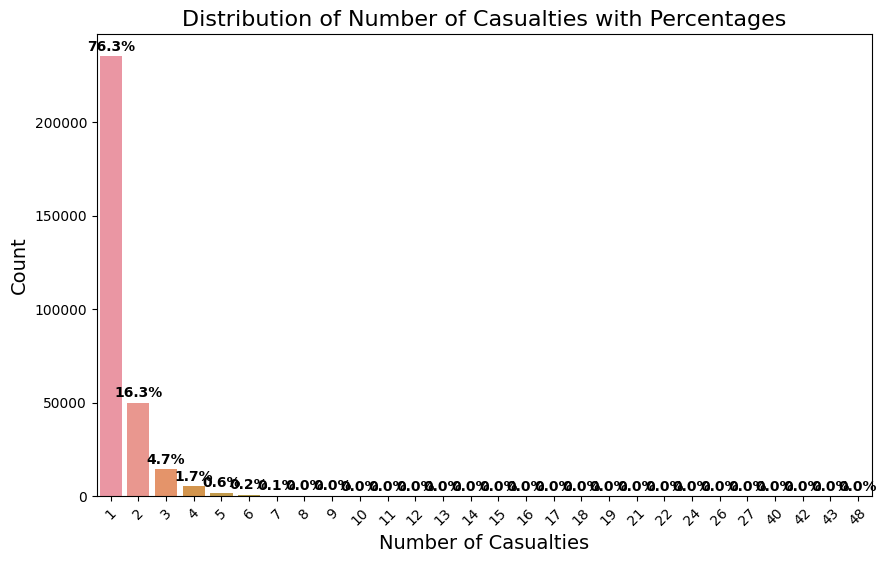

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Number_of_Casualties')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Display the plot
plt.title('Distribution of Number of Casualties with Percentages', fontsize=16)
plt.xlabel('Number of Casualties', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [16]:
df['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     183595
1      93348
3      24226
4       5077
5       1127
6        346
7        127
8         63
9         31
10        12
11         6
13         5
12         4
14         2
16         1
32         1
19         1
Name: count, dtype: int64

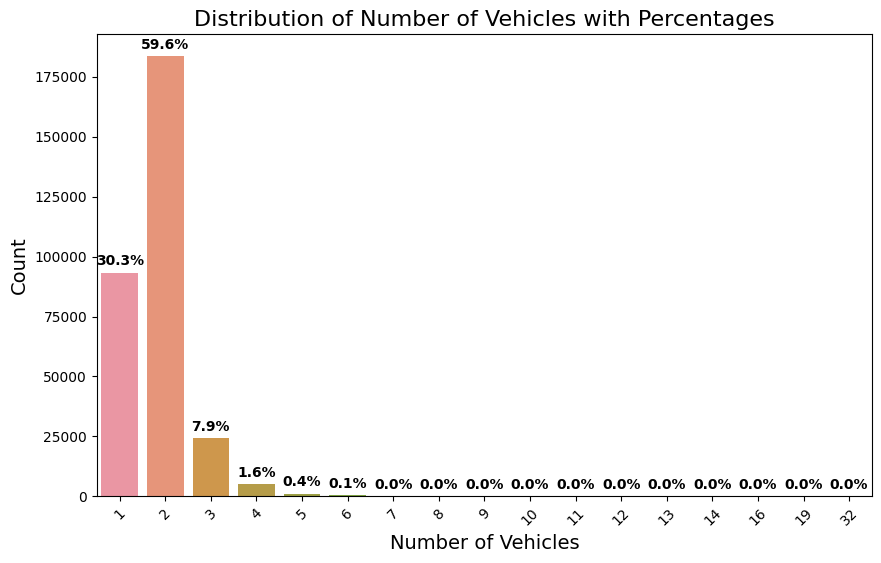

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Number_of_Vehicles')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Display the plot
plt.title('Distribution of Number of Vehicles with Percentages', fontsize=16)
plt.xlabel('Number of Vehicles', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [18]:
df['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     208967
Wet or damp              81479
Frost or ice             12077
Snow                      4758
Flood over 3cm. deep       374
-1                         317
Name: count, dtype: int64

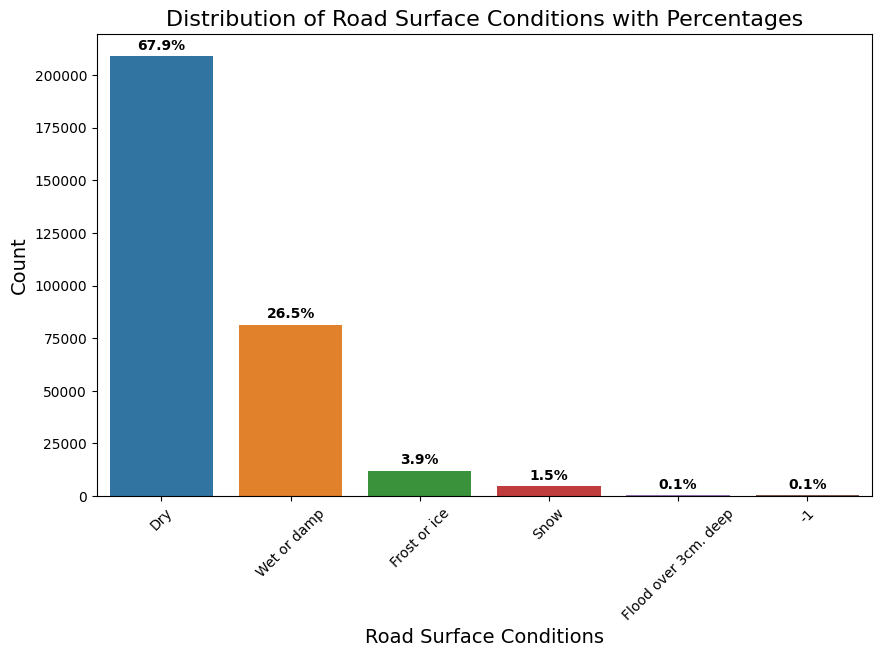

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Road_Surface_Conditions')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Display the plot
plt.title('Distribution of Road Surface Conditions with Percentages', fontsize=16)
plt.xlabel('Road Surface Conditions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [20]:
df['Road_Type'].value_counts()

Road_Type
Single carriageway    230611
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               3234
-1                      1534
Name: count, dtype: int64

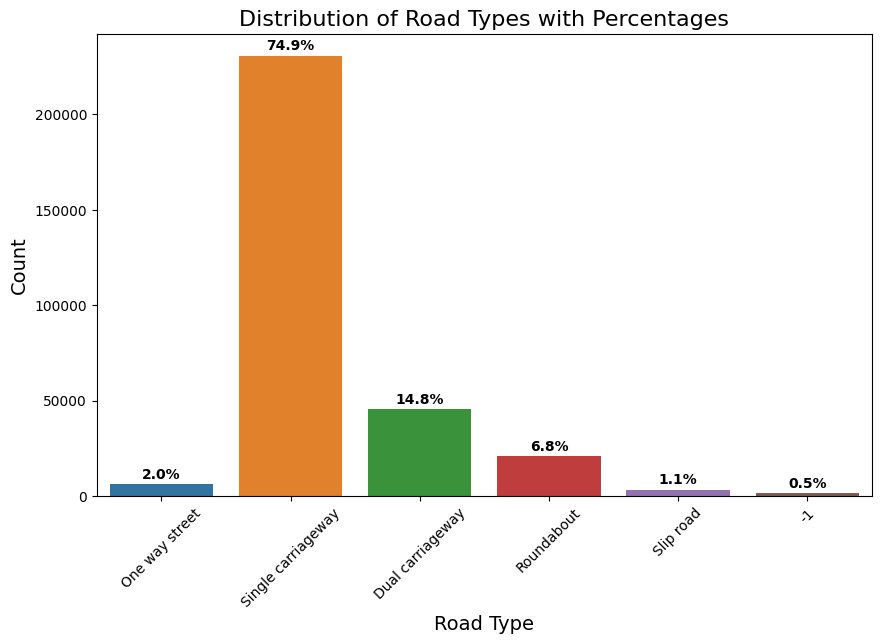

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Road_Type')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Display the plot
plt.title('Distribution of Road Types with Percentages', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [22]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    198532
Rural    109440
Name: count, dtype: int64

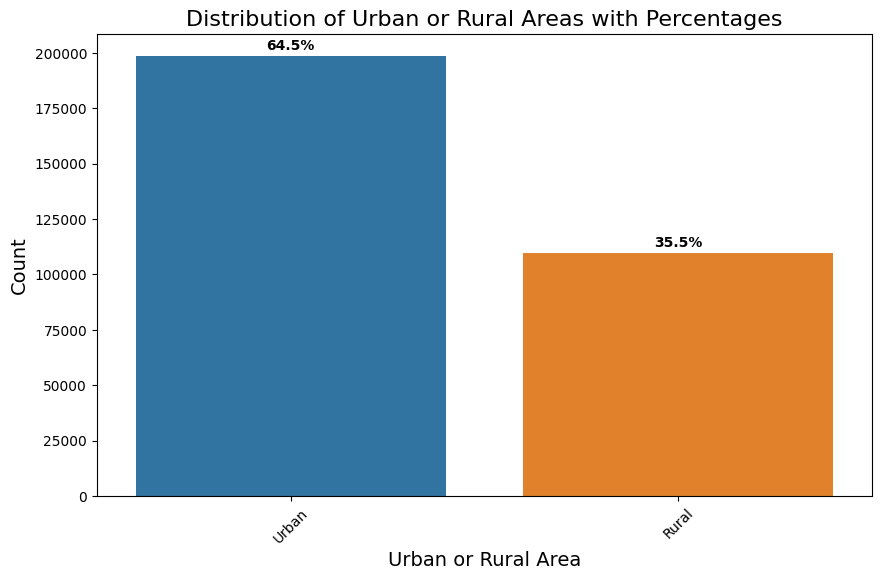

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Urban_or_Rural_Area')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Display the plot
plt.title('Distribution of Urban or Rural Areas with Percentages', fontsize=16)
plt.xlabel('Urban or Rural Area', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [24]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      239793
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

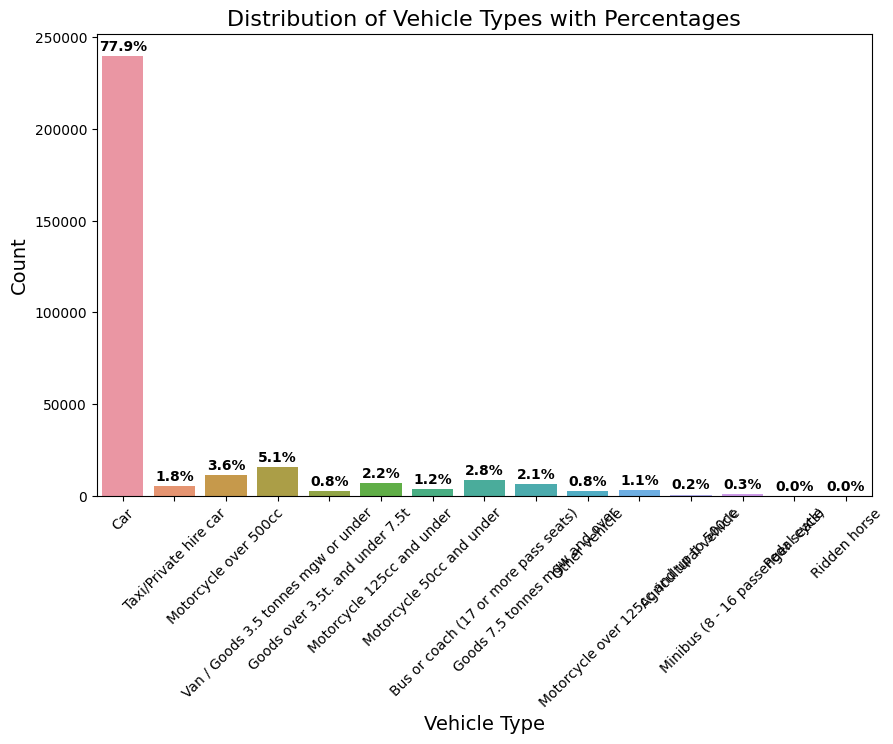

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Vehicle_Type')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Display the plot
plt.title('Distribution of Vehicle Types with Percentages', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


# Time preparing

In [26]:
df['Accident Date']

0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: Accident Date, Length: 307972, dtype: datetime64[ns]

In [27]:
df['Accident Date']=pd.to_datetime(df['Accident Date'],format= '%Y-%m-%d')

In [28]:
df['Accident Date']

0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: Accident Date, Length: 307972, dtype: datetime64[ns]

In [29]:
df.loc[10, 'Accident Date'].day_name()

'Thursday'

In [30]:
df['Accident Date'].dt.day_name()

0            Friday
1           Tuesday
2            Monday
3           Tuesday
4         Wednesday
            ...    
307968       Friday
307969       Monday
307970    Wednesday
307971    Wednesday
307972       Monday
Name: Accident Date, Length: 307972, dtype: object

In [31]:
df['DayOfWeek'] = df['Accident Date'].dt.day_name()

In [32]:
df['DayOfWeek']

0            Friday
1           Tuesday
2            Monday
3           Tuesday
4         Wednesday
            ...    
307968       Friday
307969       Monday
307970    Wednesday
307971    Wednesday
307972       Monday
Name: DayOfWeek, Length: 307972, dtype: object

In [33]:
df['Day_of_Week']

0         Thursday
1           Monday
2           Sunday
3           Monday
4          Tuesday
            ...   
307968    Thursday
307969      Sunday
307970     Tuesday
307971     Tuesday
307972      Sunday
Name: Day_of_Week, Length: 307972, dtype: object

In [34]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,DayOfWeek
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,Friday
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Tuesday
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Monday
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Tuesday
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-1,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Wednesday


In [35]:
df['Accident Date'].min()

Timestamp('2021-01-01 00:00:00')

In [36]:
df['Accident Date'].max()

Timestamp('2022-12-31 00:00:00')

In [37]:
filt = (df['Accident Date'] >= pd.to_datetime('2021-01-01')) & (df['Accident Date'] < pd.to_datetime('2022-12-31'))
df.loc[filt]

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,DayOfWeek
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,Friday
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Tuesday
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Monday
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-1,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Tuesday
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-1,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,-1,...,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car,Friday
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,-1,...,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car,Monday
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,-1,...,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car,Wednesday
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,-1,...,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc,Wednesday


In [38]:
df.set_index('Accident Date', inplace=True)

In [39]:
df

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,DayOfWeek
Accident Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,200901BS70001,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-1,-0.201349,...,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,Friday
2021-01-05,200901BS70002,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-1,-0.199248,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Tuesday
2021-01-04,200901BS70003,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-1,-0.179599,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Monday
2021-01-05,200901BS70004,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-1,-0.203110,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Tuesday
2021-01-06,200901BS70005,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-1,-0.173445,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,201091NM01760,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,-1,-3.467828,...,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car,Friday
2022-02-21,201091NM01881,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,-1,-3.809281,...,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car,Monday
2022-02-23,201091NM01935,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,-1,-3.862727,...,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car,Wednesday


In [40]:
df['2021-01':'2022-02']

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,DayOfWeek
Accident Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,200901BS70001,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-1,-0.201349,...,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,Friday
2021-01-05,200901BS70002,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-1,-0.199248,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Tuesday
2021-01-04,200901BS70003,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-1,-0.179599,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Monday
2021-01-05,200901BS70004,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-1,-0.203110,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Tuesday
2021-01-06,200901BS70005,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-1,-0.173445,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,201091NM01760,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,-1,-3.467828,...,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car,Friday
2022-02-21,201091NM01881,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,-1,-3.809281,...,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car,Monday
2022-02-23,201091NM01935,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,-1,-3.862727,...,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car,Wednesday


# ❖ Primary Objective - Total Casualties taken place after the accident

In [41]:
df['Number_of_Casualties'].sum()

417882

In [42]:
df['2021-01-01':'2022-12-31']['Number_of_Casualties'].mean()

1.3568830932682192

In [43]:
df['2021-01-01':'2022-12-31']['Number_of_Casualties'].min()

1

In [44]:
df['2021-01-01':'2022-12-31']['Number_of_Casualties'].max()

48

In [45]:
Number_of_Casualties=df['Number_of_Casualties'].resample('Y').max()

In [46]:
Number_of_Casualties

Accident Date
2021-12-31    48
2022-12-31    43
Freq: A-DEC, Name: Number_of_Casualties, dtype: int64

In [47]:
Number_of_Casualties=df['Number_of_Casualties'].resample('M').max()

In [48]:
Number_of_Casualties

Accident Date
2021-01-31    18
2021-02-28     9
2021-03-31    21
2021-04-30    13
2021-05-31    15
2021-06-30    14
2021-07-31    19
2021-08-31    16
2021-09-30    27
2021-10-31    14
2021-11-30    12
2021-12-31    48
2022-01-31    26
2022-02-28    22
2022-03-31    16
2022-04-30    17
2022-05-31    40
2022-06-30    17
2022-07-31    24
2022-08-31    17
2022-09-30    43
2022-10-31    14
2022-11-30    15
2022-12-31    42
Freq: M, Name: Number_of_Casualties, dtype: int64

In [49]:
Number_of_Casualties=df['Number_of_Casualties'].resample('D').max()

In [50]:
Number_of_Casualties

Accident Date
2021-01-01     7
2021-01-02     6
2021-01-03     5
2021-01-04     5
2021-01-05    11
              ..
2022-12-27     7
2022-12-28     7
2022-12-29     7
2022-12-30     5
2022-12-31     8
Freq: D, Name: Number_of_Casualties, Length: 730, dtype: int64

### Here's a summary of your findings:

1. Total Casualties:
   - The total number of casualties across all recorded accidents is 417,882.

2. Mean Casualties per Accident:
   - The average number of casualties per accident between January 1, 2021, and December 31, 2022, is approximately 1.36.

3. Minimum and Maximum Casualties per Accident:
   - The minimum number of casualties in a single accident is 1.
   - The maximum number of casualties in a single accident is 48.

4.Yearly Maximum Casualties:
   - The maximum number of casualties in accidents for each year:
     - 2021: 48 casualties
     - 2022: 43 casualties

5.Monthly Maximum Casualties:
   - The maximum number of casualties in accidents for each month:
     - The values range from 9 to 48, showing the highest number of casualties in a month.

## ❖ Primary Objective - Total Casualties & percentage of total with respect to accident severity and maximum casualties by type of vehicle

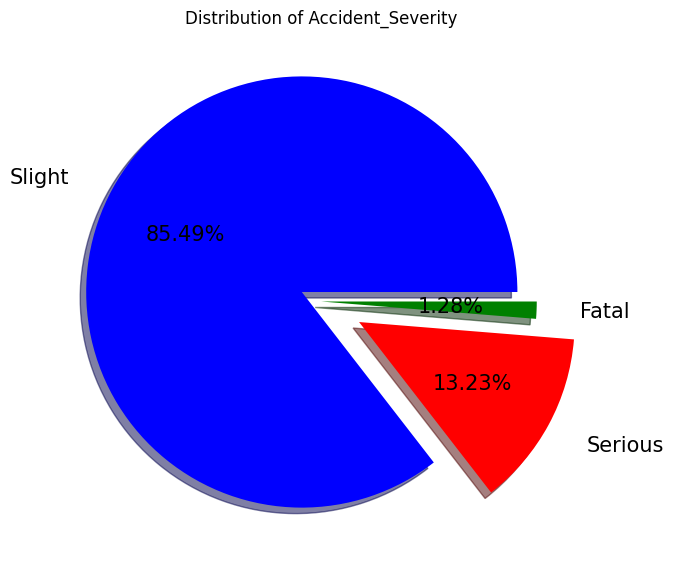

In [51]:
plt.figure(figsize=(10,7))
exp=[0.1,0.2,0]
clr=['blue','red','green']
plt.pie(x=df['Accident_Severity'].value_counts().values,
        labels=df['Accident_Severity'].value_counts().index,autopct='%2.2f%%',shadow=True,explode=exp,colors=clr,radius=1,labeldistance=1.2,
       startangle=0,textprops={"fontsize":15})
plt.title('Distribution of Accident_Severity')
plt.show()

Here's a summary based on the provided data:

1.Accident Severity Distribution:
   
   
    -Slight:  263,279 accidents
   
    -Serious: 40,740 accidents
   
    -Fatal:   3,953 accidents

2.Percentage Distribution:
  
    -Slight:  85.49%
   
    -Serious: 13.23%
  
    -Fatal:   1.28%

# ❖ Secondary KPl's - Total Casualties with respect to vehicle type

In [52]:
# create a dataframe of city and their corresponding accident cases
Vehicle_Type_df= pd.DataFrame(df['Vehicle_Type'].value_counts()).reset_index().rename(columns={'index':'Vehicle_Type', 'Vehicle':'Number_of_Casualties'})

In [53]:
Vehicle_Type_df = pd.DataFrame(df['Vehicle_Type'].value_counts()).reset_index()
Vehicle_Type_df.columns = ['Vehicle_Type', 'Number_of_Casualties']


In [54]:
Vehicle_Type_df

,Vehicle_Type,Number_of_Casualties
0,Car,239793
1,Van / Goods 3.5 tonnes mgw or under,15695
2,Motorcycle over 500cc,11226
3,Bus or coach (17 or more pass seats),8686
4,Motorcycle 125cc and under,6852
5,Goods 7.5 tonnes mgw and over,6532
6,Taxi/Private hire car,5543
7,Motorcycle 50cc and under,3703
8,Motorcycle over 125cc and up to 500cc,3285
9,Other vehicle,2516


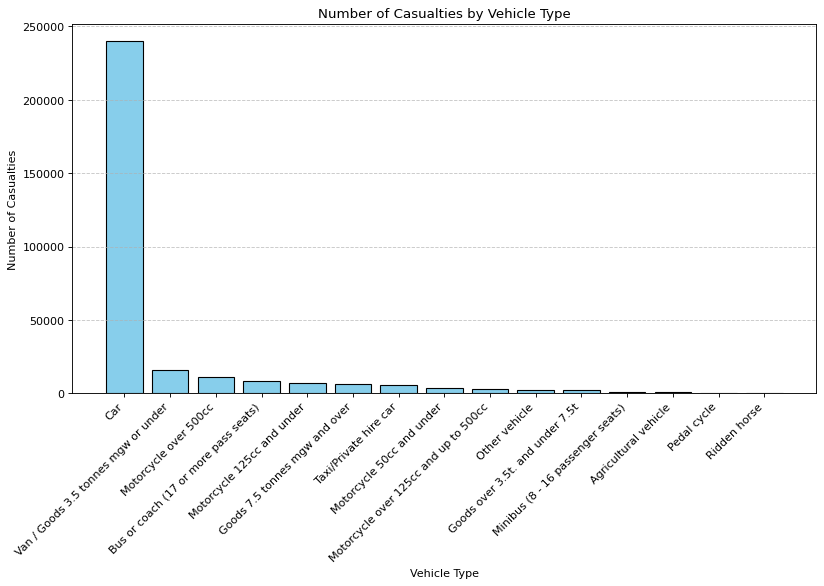

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have the Vehicle_Type_df dataframe
vehicle_types = Vehicle_Type_df['Vehicle_Type']
casualties = Vehicle_Type_df['Number_of_Casualties']

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

# Plotting the bar chart
ax.bar(vehicle_types, casualties, color='skyblue', edgecolor='black')

# Customize the plot
ax.set_title('Number of Casualties by Vehicle Type')
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Number of Casualties')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()



#### Top 10

In [56]:
top_10_Vehicle_Type_df= pd.DataFrame(Vehicle_Type_df.head(10))

In [57]:
top_10_Vehicle_Type_df

,Vehicle_Type,Number_of_Casualties
0,Car,239793
1,Van / Goods 3.5 tonnes mgw or under,15695
2,Motorcycle over 500cc,11226
3,Bus or coach (17 or more pass seats),8686
4,Motorcycle 125cc and under,6852
5,Goods 7.5 tonnes mgw and over,6532
6,Taxi/Private hire car,5543
7,Motorcycle 50cc and under,3703
8,Motorcycle over 125cc and up to 500cc,3285
9,Other vehicle,2516


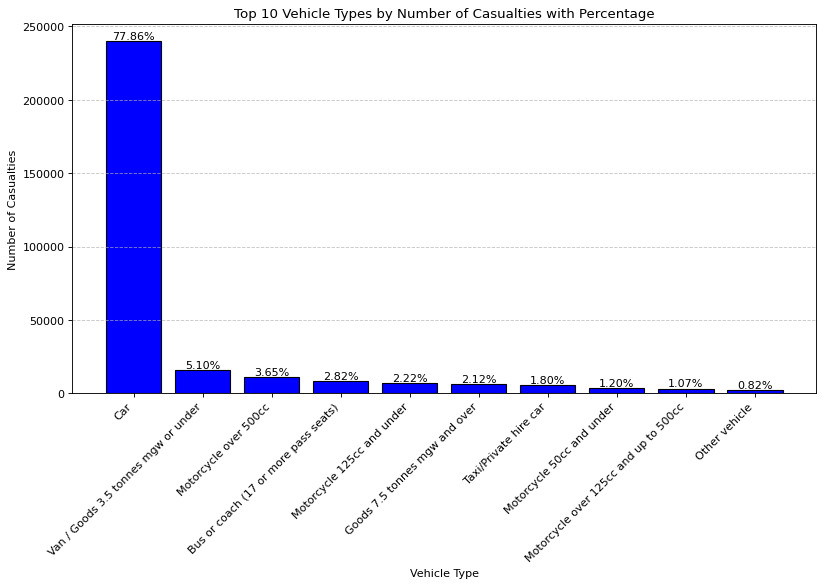

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have the Vehicle_Type_df dataframe
vehicle_types = Vehicle_Type_df['Vehicle_Type']
casualties = Vehicle_Type_df['Number_of_Casualties']

# Calculate percentage for each vehicle type
total_casualties = casualties.sum()
percentage_casualties = (casualties / total_casualties) * 100

# Combine vehicle_types, casualties, and percentage_casualties into a new dataframe
top_10_df = pd.DataFrame({'Vehicle_Type': vehicle_types, 'Number_of_Casualties': casualties, 'Percentage': percentage_casualties})
top_10_df = top_10_df.head(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

# Plotting the bar chart with percentage labels
bars = ax.bar(top_10_df['Vehicle_Type'], top_10_df['Number_of_Casualties'], color='blue', edgecolor='black')

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, top_10_df['Percentage']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{percentage:.2f}%', ha='center', va='bottom')

# Customize the plot
ax.set_title('Top 10 Vehicle Types by Number of Casualties with Percentage')
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Number of Casualties')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


### Here's a summary of the data:

Vehicle Types and Number of Casualties:
   
   - Car: 239,793 casualties or 77.86%
   
   - Van / Goods 3.5 tonnes mgw or under: 15,695 casualties or 5.10%
   
   - Motorcycle over 500cc: 11,226 casualties or 3.65 %
   
   - Bus or coach (17 or more pass seats): 8,686 casualties or 2.82%
   
   - Motorcycle 125cc and under: 6,852 casualties or 2.22%
  
   - Goods 7.5 tonnes mgw and over: 6,532 casualties or 2.12%
  
   - Taxi/Private hire car: 5,543 casualties or 1.80% 
   
   - Motorcycle 50cc and under: 3,703 casualties or 1.20 %
  
   - Motorcycle over 125cc and up to 500cc: 3,285 casualties or 1.07%
   
   - Other vehicle: 2,516 casualties or o.82%


## ❖ Monthly trend showing comparison of casualties for Current Year and Previous Year¶

In [59]:
df = pd.read_excel('/kaggle/input/road-accident-data-analysis/Road Accident Data.xlsx')

In [60]:
df['Accident Date']

0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: Accident Date, Length: 307973, dtype: datetime64[ns]

In [61]:
df['Accident Date']=pd.to_datetime(df['Accident Date'],format= '%Y-%m-%d')

In [62]:
df.loc[10, 'Accident Date'].month_name()

'January'

In [63]:
df['Accident Date'].dt.month_name()

0          January
1          January
2          January
3          January
4          January
            ...   
307968    February
307969    February
307970    February
307971    February
307972    February
Name: Accident Date, Length: 307973, dtype: object

In [64]:
df['Month Name'] = df['Accident Date'].dt.month_name()

In [65]:
df['Month Name']

0          January
1          January
2          January
3          January
4          January
            ...   
307968    February
307969    February
307970    February
307971    February
307972    February
Name: Month Name, Length: 307973, dtype: object

In [66]:
df.set_index('Accident Date', inplace=True)

In [67]:
df['Month Name'].value_counts()

Month Name
November     29095
October      28368
July         26953
September    26752
June         26748
May          26183
March        25543
August       25503
April        24225
January      23384
December     23334
February     21885
Name: count, dtype: int64

In [68]:
# create a dataframe of city and their corresponding accident cases
Vehicle_Type_df= pd.DataFrame(df['Month Name'].value_counts()).reset_index().rename(columns={'index':'Month Name', 'Vehicle':'Number_of_Casualties'})

In [69]:
month_name_df = pd.DataFrame(df['Month Name'].value_counts()).reset_index()
month_name_df.columns = ['Month Name', 'Number_of_Casualties']

In [70]:
month_name_df

,Month Name,Number_of_Casualties
0,November,29095
1,October,28368
2,July,26953
3,September,26752
4,June,26748
5,May,26183
6,March,25543
7,August,25503
8,April,24225
9,January,23384


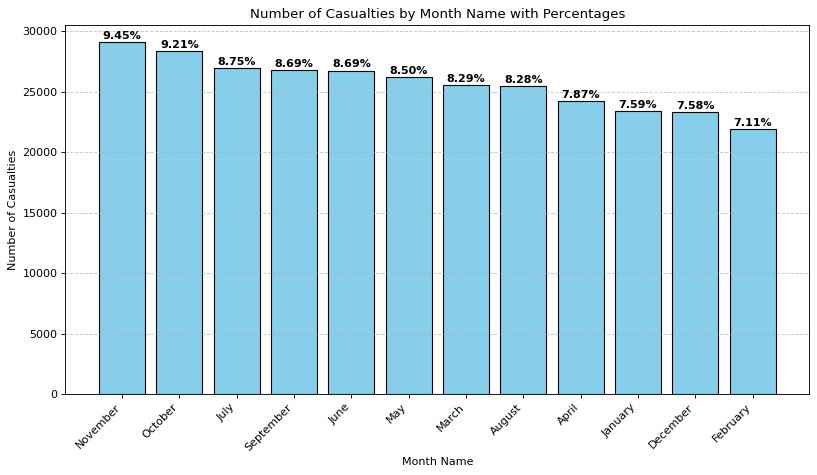

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have the month_name_df dataframe
month_name = month_name_df['Month Name']
casualties = month_name_df['Number_of_Casualties']

# Calculate the total number of casualties
total_casualties = casualties.sum()

# Calculate the percentages
percentages = (casualties / total_casualties) * 100

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

# Plotting the bar chart
bars = ax.bar(month_name, casualties, color='skyblue', edgecolor='black')

# Add percentages on top of the bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 100, f'{percentage:.2f}%', 
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Customize the plot
ax.set_title('Number of Casualties by Month Name with Percentages')
ax.set_xlabel('Month Name')
ax.set_ylabel('Number of Casualties')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


### Previous Year

In [72]:
x=df['2021-01-01':'2021-12-31']['Month Name'].value_counts()

In [73]:
x.min()

10950

In [74]:
x.max()

15473

### Corrount Year

In [75]:
y=df['2022-01-01':'2022-12-31']['Month Name'].value_counts()

In [76]:
y.min()

9625

In [77]:
y.max()

13622

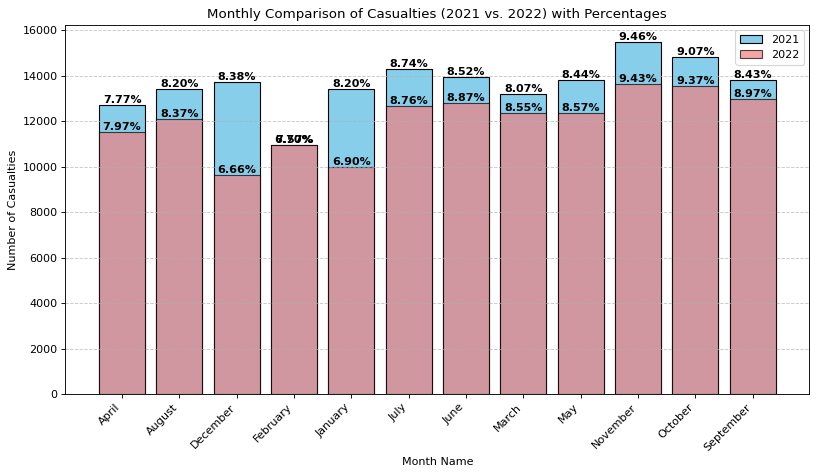

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have the casualties_2021 and casualties_2022 data
casualties_2021 = df['2021-01-01':'2021-12-31']['Month Name'].value_counts().sort_index()
casualties_2022 = df['2022-01-01':'2022-12-31']['Month Name'].value_counts().sort_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

# Plotting the bar chart for 2021
bars_2021 = ax.bar(casualties_2021.index, casualties_2021.values, color='skyblue', edgecolor='black', label='2021')

# Plotting the bar chart for 2022
bars_2022 = ax.bar(casualties_2022.index, casualties_2022.values, color='lightcoral', edgecolor='black', label='2022', alpha=0.7)

# Add percentages on top of the bars for 2021
for bar_2021 in bars_2021:
    yval = bar_2021.get_height()
    ax.text(bar_2021.get_x() + bar_2021.get_width() / 2, yval + 10, f'{(yval / sum(casualties_2021.values)) * 100:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Add percentages on top of the bars for 2022
for bar_2022 in bars_2022:
    yval = bar_2022.get_height()
    ax.text(bar_2022.get_x() + bar_2022.get_width() / 2, yval + 10, f'{(yval / sum(casualties_2022.values)) * 100:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Customize the plot
ax.set_title('Monthly Comparison of Casualties (2021 vs. 2022) with Percentages')
ax.set_xlabel('Month Name')
ax.set_ylabel('Number of Casualties')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


# ❖ Maximum casualties by Road Type

In [79]:
df['Road_Type'].value_counts()

Road_Type
Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               3234
Name: count, dtype: int64

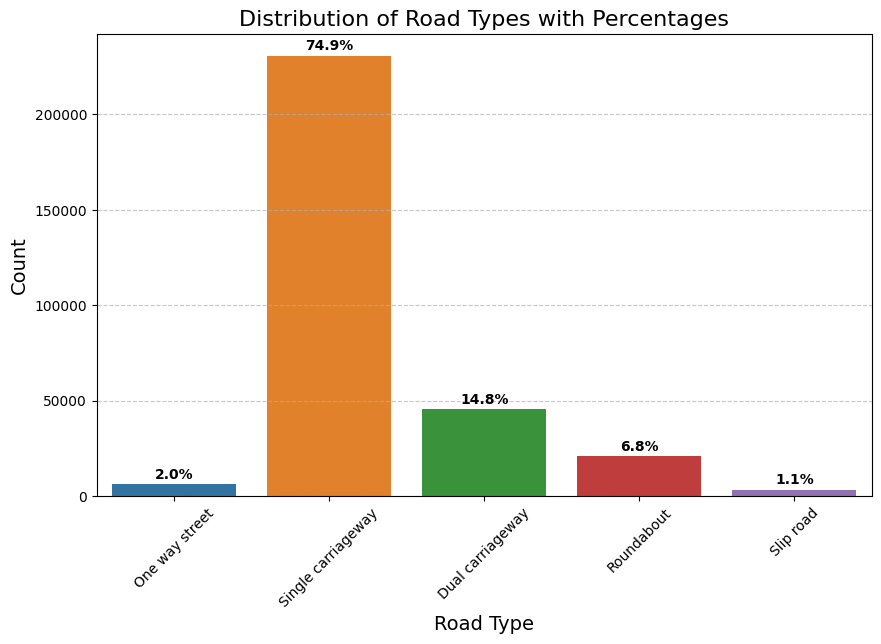

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Road_Type')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Customize the plot
plt.title('Distribution of Road Types with Percentages', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


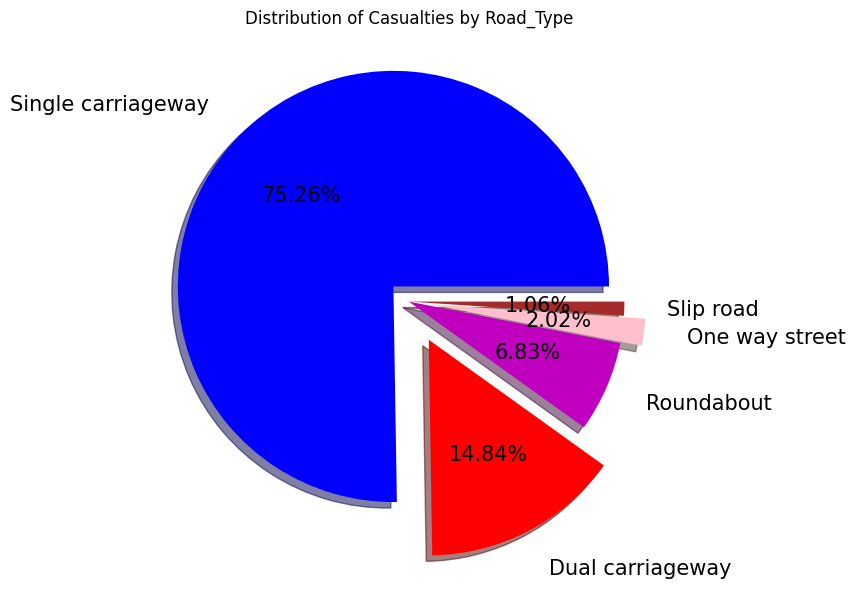

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Assuming you have a dataframe named df with a 'Road_Type' column
road_type_counts = df['Road_Type'].value_counts()
exp=[0.1,0.2,0,0.1,0]
clr=['blue','red','m','pink','brown']
plt.pie(x=road_type_counts.values,
        labels=road_type_counts.index,autopct='%2.2f%%',shadow=True,explode=exp,colors=clr,radius=1,labeldistance=1.2,
       startangle=0,textprops={"fontsize":15})

plt.title('Distribution of Casualties by Road_Type')
plt.show()

# ❖ Distribution of total casualties by Road Surface

In [82]:
df['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     208967
Wet or damp              81479
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

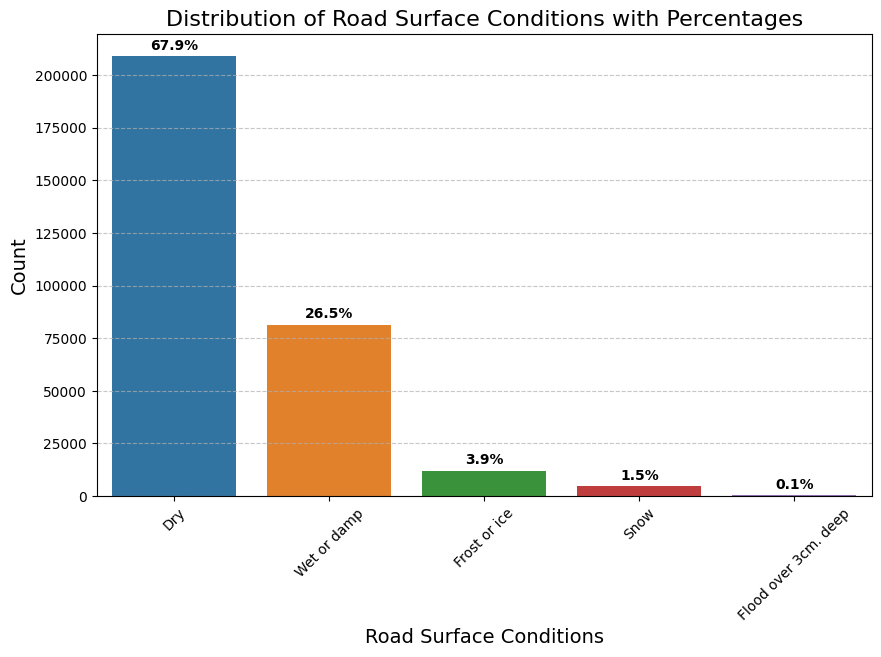

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Road_Surface_Conditions')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Customize the plot
plt.title('Distribution of Road Surface Conditions with Percentages', fontsize=16)
plt.xlabel('Road Surface Conditions', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


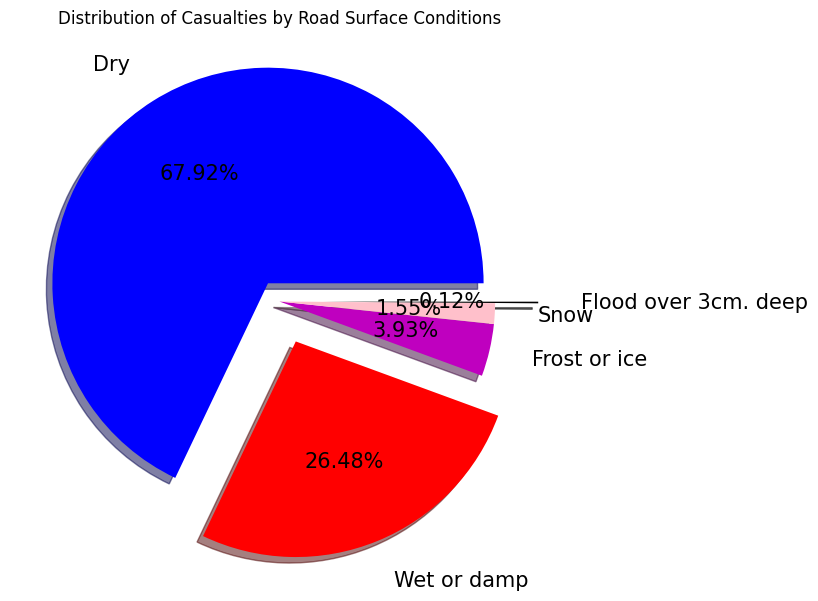

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Assuming you have a dataframe named df with a 'Road_Type' column
road_type_counts = df['Road_Surface_Conditions'].value_counts()
exp=[0.1,0.2,0,0,0.2]
clr=['blue','red','m','pink','black']
plt.pie(x=road_type_counts.values,labels=road_type_counts.index,autopct='%2.2f%%',shadow=True,explode=exp,
        colors=clr,radius=1,labeldistance=1.2,
       startangle=0,textprops={"fontsize":15})

plt.title('Distribution of Casualties by Road Surface Conditions')
plt.show()


# Casualties by Area/ Location

In [85]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    198532
Rural    109441
Name: count, dtype: int64

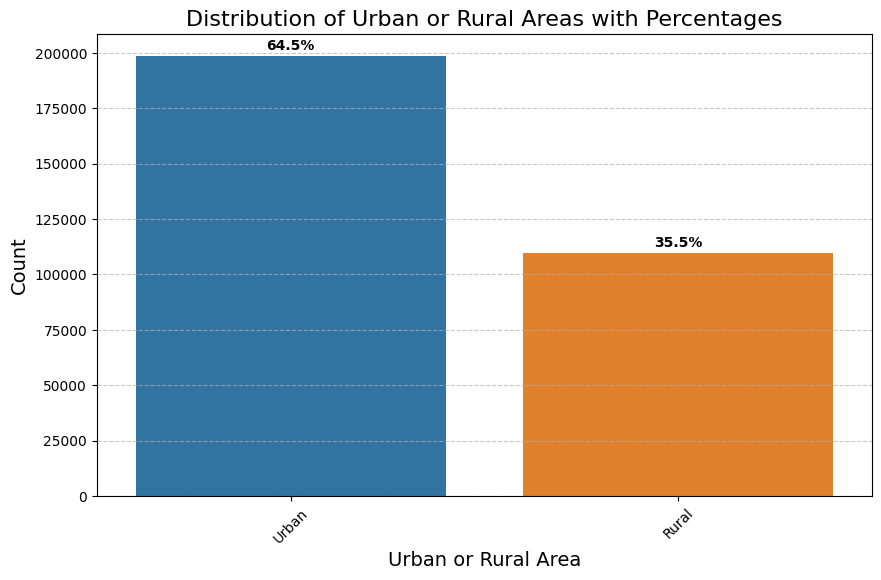

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn
ax = sns.countplot(data=df, x='Urban_or_Rural_Area')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)

# Add percentages on top of the bars
total = len(df)  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center', fontsize=10, weight='bold')

# Customize the plot
plt.title('Distribution of Urban or Rural Areas with Percentages', fontsize=16)
plt.xlabel('Urban or Rural Area', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


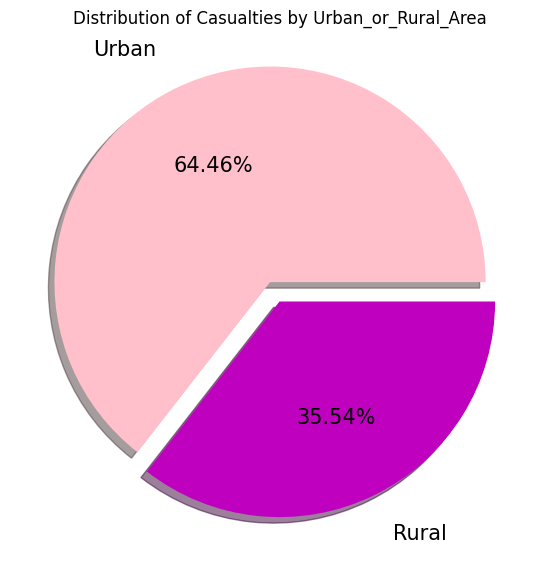

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Assuming you have a dataframe named df with a 'Road_Type' column
road_type_counts = df['Urban_or_Rural_Area'].value_counts()
exp=[0.1,0]
clr=['pink','m']
plt.pie(x=road_type_counts.values,
        labels=road_type_counts.index,autopct='%2.2f%%',shadow=True,explode=exp,colors=clr,radius=1,labeldistance=1.2,
       startangle=0,textprops={"fontsize":15})

plt.title('Distribution of Casualties by Urban_or_Rural_Area')
plt.show()


# Casualties by Day/ Night

In [88]:
df['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: count, dtype: int64

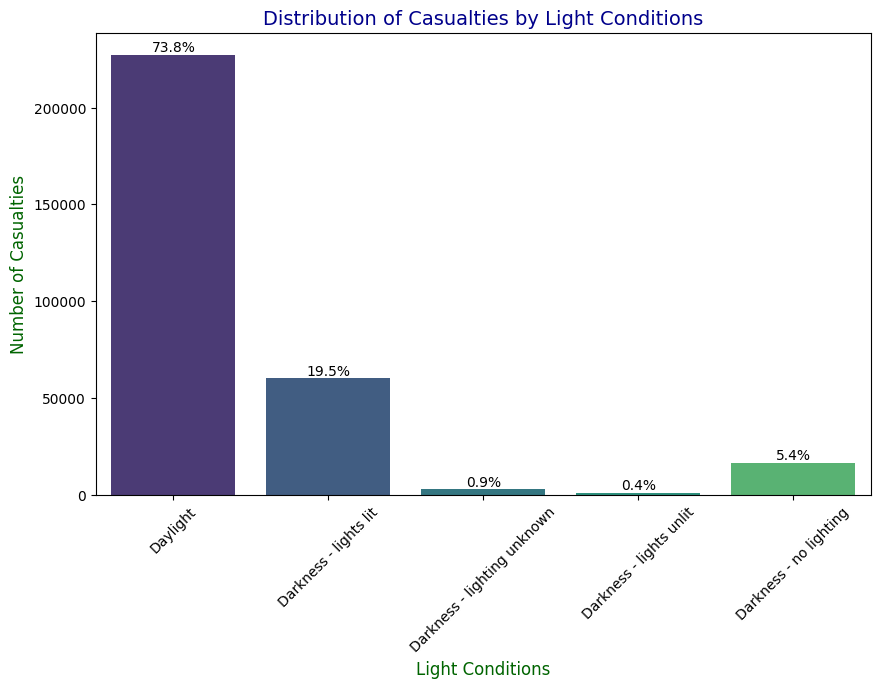

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette for the plot
colors = sns.color_palette("viridis")

# Set the figure size to avoid overlapping axis tick labels
plt.figure(figsize=(10, 6))

# Create the countplot using seaborn with specified color palette
ax = sns.countplot(data=df, x='Light_Conditions', palette=colors)

# Add percentage annotations on top of the bars
total = len(df['Light_Conditions'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=45)
plt.title('Distribution of Casualties by Light Conditions', fontsize=14, color='darkblue')
plt.xlabel('Light Conditions', fontsize=12, color='darkgreen')
plt.ylabel('Number of Casualties', fontsize=12, color='darkgreen')

# Display the plot
plt.show()


# ❖ Relation between Casualties by Area/ Location & by Day/ Night¶

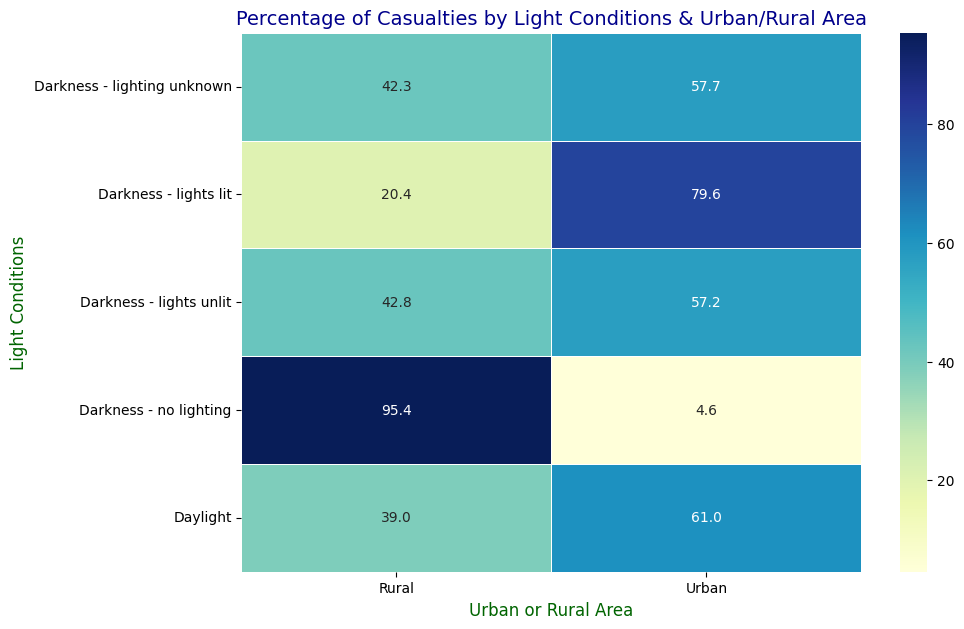

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe named df with relevant columns
# Replace 'df' and column names accordingly

# Create a pivot table
pivot_table = df.pivot_table(index='Light_Conditions', columns='Urban_or_Rural_Area', values='Number_of_Casualties', aggfunc='sum')

# Normalize the values to show percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Create a heatmap with percentage annotations
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.1f', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Percentage of Casualties by Light Conditions & Urban/Rural Area', fontsize=14, color='darkblue')
plt.xlabel('Urban or Rural Area', fontsize=12, color='darkgreen')
plt.ylabel('Light Conditions', fontsize=12, color='darkgreen')

# Display the plot
plt.show()


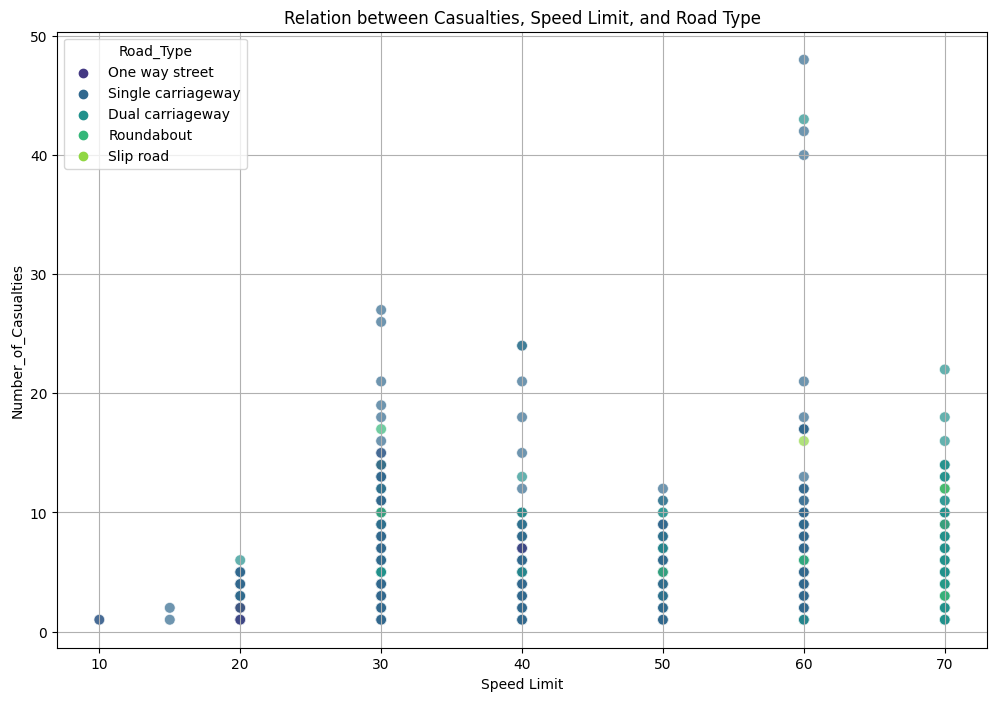

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe named df with 'Casualties', 'Speed_limit', and 'Road_Type' columns
# You may need to adjust column names based on your actual dataframe

plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x='Speed_limit', y='Number_of_Casualties', hue='Road_Type', data=df, palette='viridis', s=60, alpha=0.7)

# Customize the plot
plt.title('Relation between Casualties, Speed Limit, and Road Type')
plt.xlabel('Speed Limit')
plt.ylabel('Number_of_Casualties')
plt.legend(title='Road_Type')
plt.grid(True)

plt.show()


# Relation between Casualties by Speed limit, Road Type, and Weather Conditions

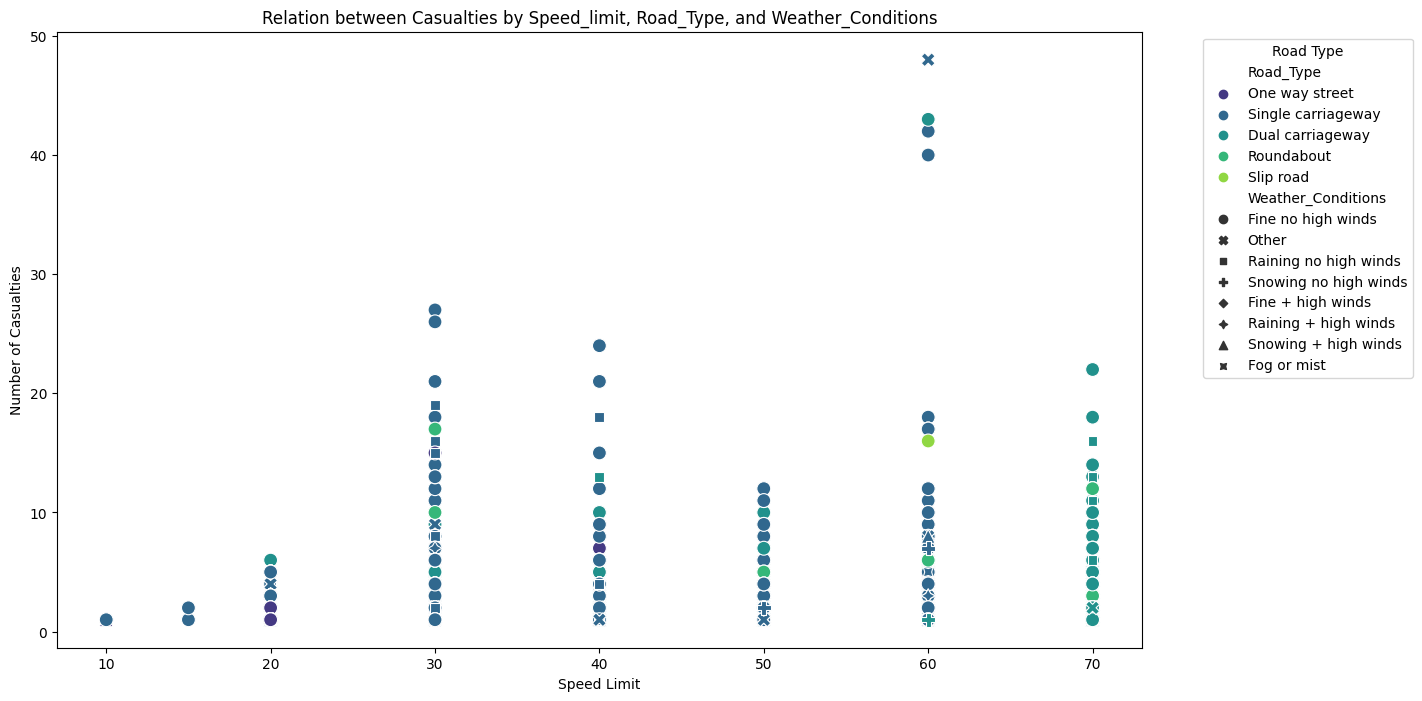

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe named df with relevant columns: 'Speed_limit', 'Road_Type', 'Weather_Conditions', 'Number_of_Casualties'
# You may need to preprocess your data accordingly

plt.figure(figsize=(14, 8))

# Scatter plot
sns.scatterplot(x='Speed_limit', y='Number_of_Casualties', hue='Road_Type', style='Weather_Conditions', data=df, palette='viridis', s=100)

# Customize the plot
plt.title('Relation between Casualties by Speed_limit, Road_Type, and Weather_Conditions')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Casualties')
plt.legend(title='Road Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
